In [14]:
import matplotlib.pyplot as plt
import numpy as np

In [23]:
def MC(nsteps=10000,delta=1.0,q0=None):#,L=4,kT=1):
    if q0 is None:
        q0=np.zeros((2,3))
    
    q=+q0
    #energy=ener(q)
    energy=0.5*(np.sqrt(np.sum((q[1]-q[0])**2))-4)**2
    traj=[]
    for istep in range(nsteps):
        i=np.random.randint(6)
        qtry=+q
        inc=(2*np.random.rand()-1)*delta
        if(i<3):
            qtry[0,i]+=inc
        else:
            qtry[1,i-3]+=inc
            
        ##enetry=ener(qtry)##0.5*(np.sqrt(np.sum((qtry[1]-qtry[0])**2))-L)**2
        enetry=0.5*(np.sqrt(np.sum((qtry[1]-qtry[0])**2))-4)**2
        acc=np.exp(-(enetry-energy))#/kT)
        if acc>1.0:
            acc=1.0
        if acc>np.random.rand():
            q=+qtry
            energy=enetry
        traj.append(q)
    return np.array(traj)

In [19]:
def bussi(nsteps=10000,delta=1.0,q0=None):
    if q0 is None:
        q0=np.zeros((2,3))
    
    q=+q0
    
    ene=0.5*(np.sqrt(np.sum((q[1]-q[0])**2))-4)**2
    traj=[]
    for istep in range(nsteps):
        i=np.random.randint(6)
        qtry=+q
        inc=(2*np.random.rand()-1)*delta
        if(i<3):
            qtry[0,i]+=inc
        else:
            qtry[1,i-3]+=inc

        enetry=0.5*(np.sqrt(np.sum((qtry[1]-qtry[0])**2))-4)**2
        acc=np.exp(-(enetry-ene))
        if acc>1.0:
            acc=1.0
        if acc>np.random.rand():
            q=+qtry
            ene=enetry
        traj.append(q)
    return np.array(traj)

<BarContainer object of 100 artists>


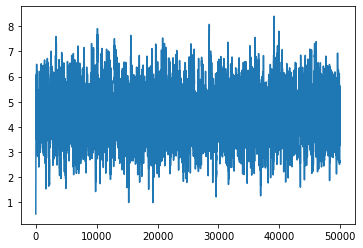

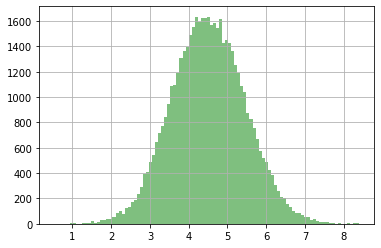

In [24]:
traj=MC(nsteps=50000)
#distances=np.sqrt((traj[:,0,0]-traj[:,1,0])**2+(traj[:,0,1]-traj[:,1,1])**2+(traj[:,0,2]-traj[:,1,2])**2)
distances=np.sqrt(np.sum((traj[:,1]-traj[:,0])**2,axis=1))
plt.plot(distances)

plt.figure(2)
nbins=100
n, bins, patches = plt.hist(distances, nbins,facecolor='green', alpha=0.5)
print(patches)
plt.grid(axis='both')
plt.show()